In [213]:
cd ~ 

C:\Users\Tommaso


In [214]:
cd ./Desktop/Hult documents/Machine Learning 

C:\Users\Tommaso\Desktop\Hult documents\Machine Learning


In [215]:
# Import of principal packages
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [216]:
# Exploring folder for Excel file

for datasets in listdir(path = '.'):
    print(datasets)

.ipynb_checkpoints
birthweight.xlsx
birthweight_data_dictionary.rtf
birthweight_low 1.xlsx
birthweight_low.xlsx
Code for Apgar indexing.txt
Datacamp ML 2.pdf
Datacamp ML 3.pdf
Datacamp ML 4.pdf
Datacampa ML 1.pdf
Datacamp_Supervised Learning.pdf
Dropping missing data  Python.pdf
introduction_to_ml_with_python-master
Machine learning.docx
Model Birthweight.jpg
Outcomes model Birthweight_real.xlsx
Plan for variable engineering.docx
Preparation to Class 2.docx
Regression data.txt
Regression Output Cheat Sheet.xlsx
Sessions 1-4 (Regression Modeling)
Student.csv
Untitled1.ipynb
[ML] Introduction to Machine Learning with Python (2017).pdf
~$an for variable engineering.docx


In [217]:
# Import of file 

dataframe = './birthweight_low.xlsx'

# Read file and looking for every type of missing values

real = pd.read_excel(io = dataframe,
                     sheet_name = 0,
                     header = 0,
                     na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', 
                    '-1.#QNAN', '-NaN', '-nan','1.#IND', '1.#QNAN', '<NA>', 
                    'N/A', 'NA', 'NULL', 'NaN', 'n/a','nan', 'null','?'])
real.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [218]:
# characteristics of variables in dataset
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [219]:
# Change of variables that are not consistent with previous type (float)

data_types = {'medu' : int,
              'npvis': int,
              'feduc' : int}

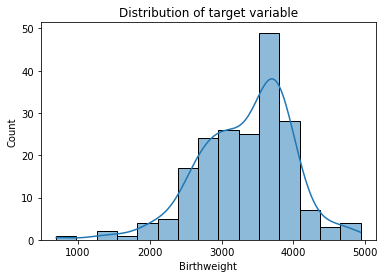

In [220]:
# Distribution of the target variable: not normally distributed
# Creation of histogram to visualize distribution
sns.histplot(data = real,
             x = 'bwght',
             kde = True)

plt.title(label = 'Distribution of target variable')
plt.xlabel(xlabel = 'Birthweight')
plt.ylabel(ylabel = 'Count')
plt.show()

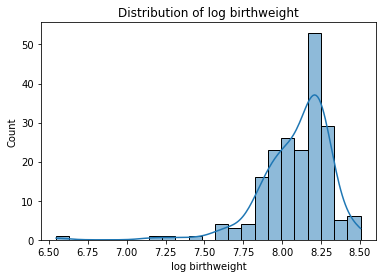

In [221]:
# Visualization of logarithm of target variable
# Histogram to visualize
real['log_bwght'] = np.log(real['bwght'])

sns.histplot(data = real,
             x = 'log_bwght',
             kde = True)

plt.title(label = 'Distribution of log birthweight')
plt.xlabel(xlabel = 'log birthweight')
plt.ylabel(ylabel = 'Count')
plt.show()

In [222]:
# Assumption on y: variable continuous. Function describe to check how many other are continuous

real.describe(include = 'number').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,8.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.23
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,6.55
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,7.98
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,8.15
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,8.23
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,8.50


In [223]:
# Checked the correlation between all continuous variables in dataset

numerical_data = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'bwght']

real_corr = real[numerical_data].corr(method = 'pearson')
print(real_corr)

            mage     meduc    monpre     npvis      fage     feduc     omaps  \
mage    1.000000 -0.096693  0.164198 -0.051850  0.583608 -0.090004 -0.211302   
meduc  -0.096693  1.000000 -0.235765  0.141150 -0.071318  0.630630  0.255120   
monpre  0.164198 -0.235765  1.000000 -0.343161  0.042767 -0.333480 -0.168007   
npvis  -0.051850  0.141150 -0.343161  1.000000 -0.061975  0.026863  0.091494   
fage    0.583608 -0.071318  0.042767 -0.061975  1.000000 -0.013344 -0.157184   
feduc  -0.090004  0.630630 -0.333480  0.026863 -0.013344  1.000000  0.339666   
omaps  -0.211302  0.255120 -0.168007  0.091494 -0.157184  0.339666  1.000000   
fmaps  -0.238031  0.144510 -0.084856  0.087767 -0.196277  0.136041  0.640958   
cigs    0.167293  0.104831 -0.058436  0.036387  0.174795  0.050916 -0.149436   
drink   0.336698 -0.072426  0.015553 -0.067837  0.291435 -0.124482 -0.175694   
bwght  -0.463811  0.099364 -0.051827  0.061689 -0.395985  0.139460  0.250153   

           fmaps      cigs     drink   

In [224]:
# Coefficients of correlation between continuous variables and target
real_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = True)

drink    -0.74
cigs     -0.57
mage     -0.46
fage     -0.40
monpre   -0.05
npvis     0.06
meduc     0.10
feduc     0.14
omaps     0.25
fmaps     0.25
bwght     1.00
Name: bwght, dtype: float64

In [225]:
# List of categorical variables
#Pearson correlation with target
categorical_data = ['male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght']

real_corr_2 = real[categorical_data].corr(method = 'pearson')

In [226]:
real_corr_2.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = True) # Result of correlation

mwhte   -0.11
foth    -0.08
fwhte   -0.04
moth    -0.02
male     0.11
fblck    0.12
mblck    0.13
bwght    1.00
Name: bwght, dtype: float64

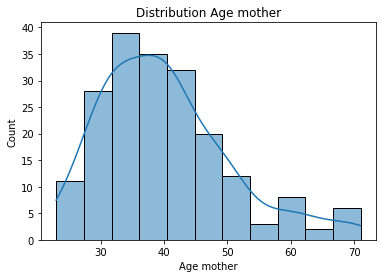

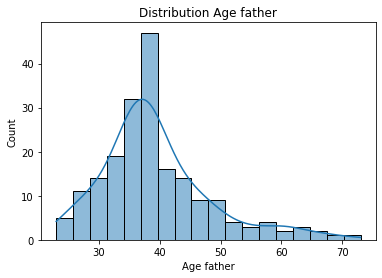

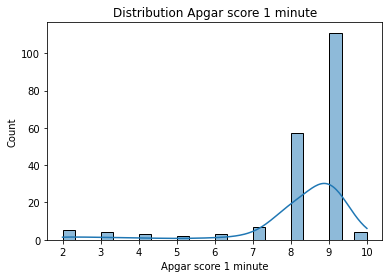

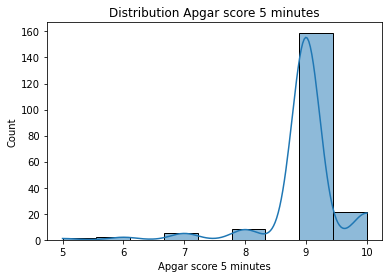

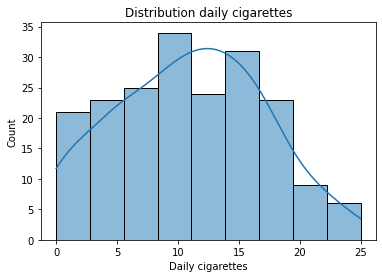

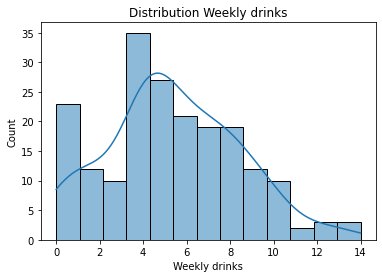

In [227]:
# Explore every single x-variable with a histogram to see distribution
# Histogram for age of mother
sns.histplot(data = real,
             x = 'mage',
             kde = True)
plt.title(label = 'Distribution Age mother')
plt.xlabel(xlabel = 'Age mother')
plt.ylabel(ylabel = 'Count')
plt.show() 

# Histogram for age of father
sns.histplot(data = real,
             x = 'fage',
             kde = True)
plt.title(label = 'Distribution Age father')
plt.xlabel(xlabel = 'Age father')
plt.ylabel(ylabel = 'Count')
plt.show()

# Histogram for Apgar test 1 minute
sns.histplot(data = real,
             x = 'omaps',
             kde = True)
plt.title(label = 'Distribution Apgar score 1 minute')
plt.xlabel(xlabel = 'Apgar score 1 minute')
plt.ylabel(ylabel = 'Count')
plt.show()

# Histogram for Apgar test 5 minutes
sns.histplot(data = real,
             x = 'fmaps',
             kde = True)
plt.title(label = 'Distribution Apgar score 5 minutes')
plt.xlabel(xlabel = 'Apgar score 5 minutes')
plt.ylabel(ylabel = 'Count')
plt.show()

# Histogram for cigarettes
sns.histplot(data = real,
             x = 'cigs',
             kde = True)
plt.title(label = 'Distribution daily cigarettes')
plt.xlabel(xlabel = 'Daily cigarettes')
plt.ylabel(ylabel = 'Count')
plt.show()

#Histogram for drink
sns.histplot(data = real,
             x = 'drink',
             kde = True)
plt.title(label = 'Distribution Weekly drinks')
plt.xlabel(xlabel = 'Weekly drinks')
plt.ylabel(ylabel = 'Count')
plt.show()

In [228]:
# Logarithmic variables for relevant X 
# Choice on base of coefficients of correlation
real['log_mage'] = np.log(real['mage'])
real['log_fage'] = np.log(real['fage'])
real['log_omaps'] = np.log(real['omaps'])
real['log_fmaps'] = np.log(real['fmaps'])

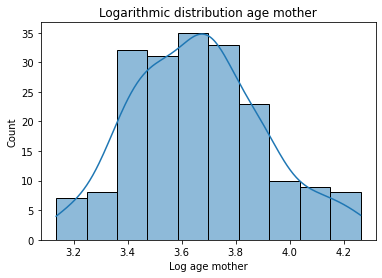

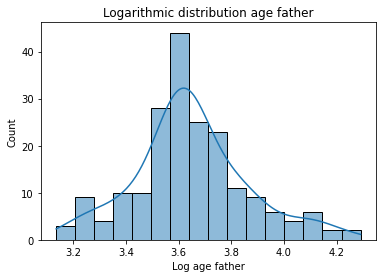

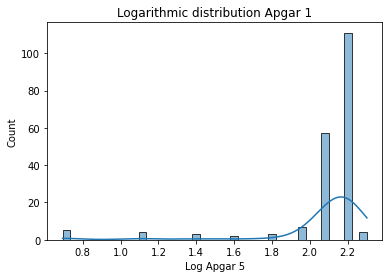

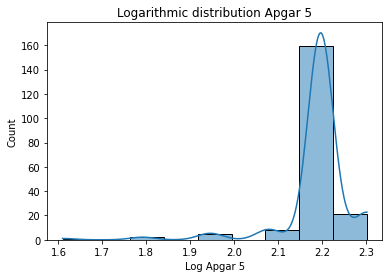

In [229]:
#Distribution of logarithmic variables 
# Histogram for logarithmic age mother
sns.histplot(data = real,
             x = 'log_mage',
             kde = True)
plt.title(label = 'Logarithmic distribution age mother')
plt.xlabel(xlabel = 'Log age mother')
plt.ylabel(ylabel = 'Count')
plt.show()

# Histogram for logarithmic age father
sns.histplot(data = real,
             x = 'log_fage',
             kde = True)
plt.title(label = 'Logarithmic distribution age father')
plt.xlabel(xlabel = 'Log age father')
plt.ylabel(ylabel = 'Count')
plt.show()

# Histogram for logarithmic Apgar Test 1 minute
sns.histplot(data = real,
             x = 'log_omaps',
             kde = True)
plt.title(label = 'Logarithmic distribution Apgar 1')
plt.xlabel(xlabel = 'Log Apgar 5')
plt.ylabel(ylabel = 'Count')
plt.show()

# Histogram for logarithmic Apgar Test 5 minutes
sns.histplot(data = real,
             x = 'log_fmaps',
             kde = True)
plt.title(label = 'Logarithmic distribution Apgar 5')
plt.xlabel(xlabel = 'Log Apgar 5')
plt.ylabel(ylabel = 'Count')
plt.show()

In [230]:
# List of logarithmic variables to explore their correlation with target
logarithmic_data = ['log_mage', 'log_fage', 'log_omaps', 'log_fmaps', 'bwght']

real_3 = real[logarithmic_data].corr(method = 'pearson')

real_3.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = True)

log_mage    -0.42
log_fage    -0.38
log_omaps    0.26
log_fmaps    0.26
bwght        1.00
Name: bwght, dtype: float64

In [231]:
# First matrix for OLS correlation: comprehension of entire dataset
real_ols = smf.ols(formula = """bwght ~ mage + 
                                        meduc +                                                                          
                                        fage +
                                        monpre +
                                        npvis +
                                        feduc +
                                        omaps +
                                        fmaps +                                    
                                        cigs +
                                        drink +
                                        male +
                                        mwhte +
                                        mblck +
                                        moth +
                                        fwhte +
                                        fblck +
                                        foth +
                                        log_mage +
                                        log_fage +
                                        log_omaps +
                                        log_fmaps                                        
                                        """,
                                        data = real)
outcome = real_ols.fit()
print(outcome.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     26.49
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.40e-40
Time:                        20:03:32   Log-Likelihood:                -1330.1
No. Observations:                 186   AIC:                             2700.
Df Residuals:                     166   BIC:                             2765.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1440.5923   2432.024     -0.592      0.5

In [232]:
real.isnull().sum() # Sum of missing values in entire dataset

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_mage     0
log_fage     0
log_omaps    0
log_fmaps    0
dtype: int64

In [233]:
# Code for missing values columns
for col in real:
    if real[col].isnull().astype(int).sum() > 0:
        real['m_'+col] = real[col].isnull().astype(int)
        
real[ ['m_meduc', 'm_npvis', 'm_feduc'] ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [234]:
# Due to low number of cases and small standard devation for every variable, they will be filled the mean

fill = real['meduc'].mean()
fill = real['npvis'].mean()
fill = real['feduc'].mean()

real['meduc'].fillna(fill,
                           inplace = True) # Add of inplace to fill dataset named real
real['npvis'].fillna(fill,
                      inplace = True)
real['feduc'].fillna(fill,
                           inplace = True)

In [235]:
real.isnull().any() # Check of missing values still present 

mage         False
meduc        False
monpre       False
npvis        False
fage         False
feduc        False
omaps        False
fmaps        False
cigs         False
drink        False
male         False
mwhte        False
mblck        False
moth         False
fwhte        False
fblck        False
foth         False
bwght        False
log_bwght    False
log_mage     False
log_fage     False
log_omaps    False
log_fmaps    False
m_meduc      False
m_npvis      False
m_feduc      False
dtype: bool

<AxesSubplot:xlabel='drink', ylabel='bwght'>

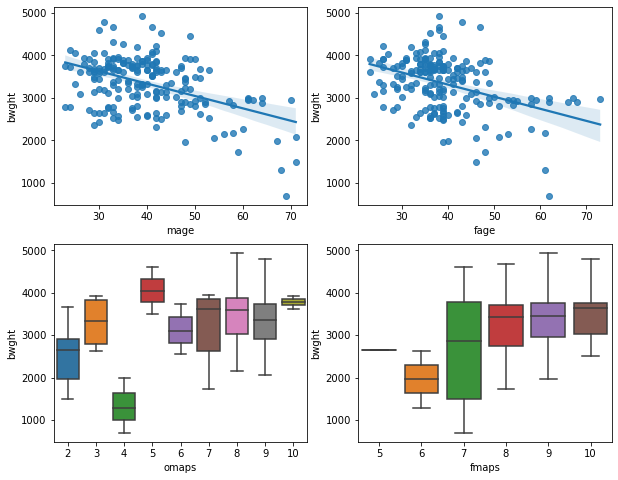

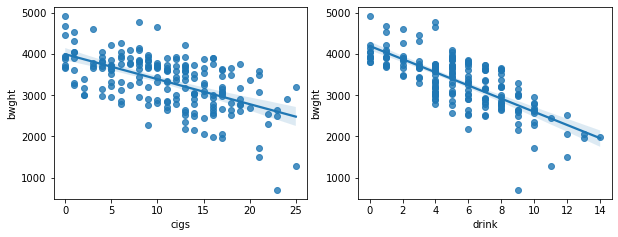

In [236]:
# Creation of scatterplots
# Correlation between most relevant continuous variables and target
fig, ax = plt.subplots(figsize = (10, 8))

plt.subplot(2, 2, 1)
sns.regplot(x = real['mage'],
            y = real['bwght']) # Use of regplot to have trendline

plt.subplot(2, 2, 2)
sns.regplot(x = real['fage'],
            y = real['bwght'])

plt.subplot(2, 2, 3)
sns.boxplot(x = real['omaps'],
            y = real['bwght']) # Use of boxplot for numerical discrete values

plt.subplot(2, 2, 4)
sns.boxplot(x = real['fmaps'],
            y = real['bwght'])

fig, ax = plt.subplots(figsize = (10, 12)) # Space for other scatterplots

plt.subplot(3, 2, 1)
sns.regplot(x = real['cigs'],
            y = real['bwght'])

plt.subplot(3, 2, 2)
sns.regplot(x = real['drink'],
            y = real['bwght'])

<AxesSubplot:xlabel='moth', ylabel='bwght'>

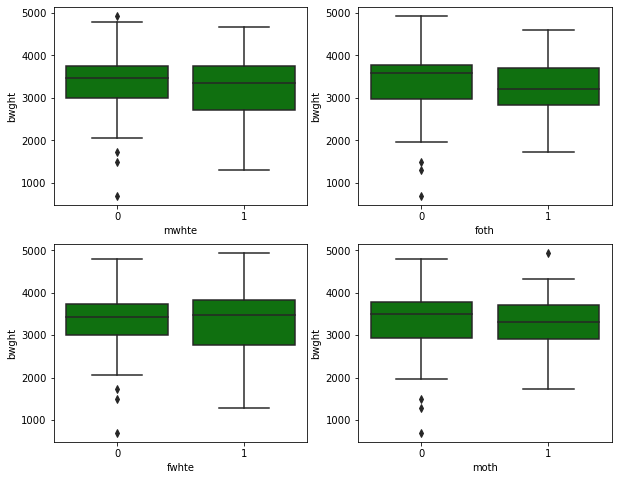

In [237]:
# Visualization of correlation with most relevant categorical values
fig, ax = plt.subplots(figsize = (10, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x = real['mwhte'],
                y = real['bwght'],
                color = 'g')

plt.subplot(2, 2, 2)
sns.boxplot(x = real['foth'],
                y = real['bwght'],
                color = 'g')

plt.subplot(2, 2, 3)
sns.boxplot(x = real['fwhte'],
                y = real['bwght'],
                color = 'g')


plt.subplot(2, 2, 4)
sns.boxplot(x = real['moth'],
                y = real['bwght'],
                color = 'g')


In [238]:
real_corr = real.corr() # Preparation of correlation for heatmaps

<AxesSubplot:>

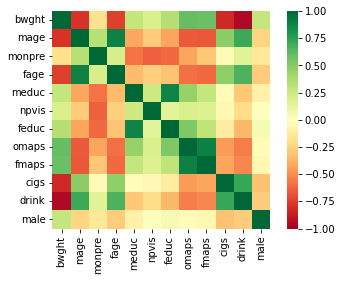

In [239]:
# First heatmap for correlation with numerical values
real_heat = real_corr.loc[ ['bwght', 'mage', 'monpre', 'fage', 
                         'meduc', 'npvis', 'feduc', 'omaps', 'fmaps',
                         'cigs', 'drink', 'male'],
                        ['bwght', 'mage', 'monpre', 'fage', 
                         'meduc', 'npvis', 'feduc', 'omaps', 'fmaps',
                         'cigs', 'drink', 'male'] ]

sns.heatmap(real_heat.corr(), vmin = -1.00, vmax = 1.00, square = True, cmap = 'RdYlGn') # Choice of red-yellow-green to 
                                                                                         # make evident positive-negative correlations

<AxesSubplot:>

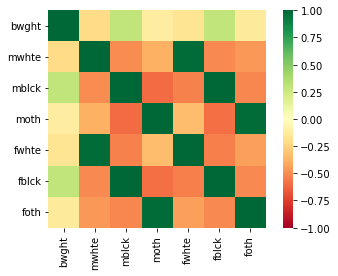

In [240]:
# Second heatmap for correlation with categorical values
real_heat2 = real_corr.loc[ ['bwght', 'mwhte', 'mblck', 'moth',
                             'fwhte', 'fblck', 'foth'],
                         ['bwght', 'mwhte', 'mblck', 'moth',
                          'fwhte', 'fblck', 'foth'] ]

sns.heatmap(real_heat2.corr(), vmin = -1.00, vmax = 1.00, square = True, cmap = 'RdYlGn')

In [241]:
# Import of packages from sklearn to split and do linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [242]:
# Division of variable age mother into two categories basing on correlation in scatterplot
for index, col in real.iterrows():
    if real.loc[index, 'mage'] <= 45:
        real.loc[index, 'mage'] = 'Low'
        
    elif real.loc[index, 'mage'] >45:
        real.loc[index, 'mage'] = 'High'
        
    else:
        real.loc[index, 'mage'] = 'Error'

In [243]:
# Creation of dummies for variable age mother and union to dataset
new_age = pd.get_dummies(real['mage'])
real = real.join(new_age) 

In [244]:
# Addition between two most relevant variables in dataset
real['Unhealthy'] = real['drink'] + real['cigs'] 

In [245]:
# Multiplication of the effect of previous variable per normalized distribution of most relevant age 
real['Father'] = real['log_fage'] * real['Unhealthy']

In [246]:
# Addition between most relevant age and normalized distribution of most relevant Test
real['Father_2'] = real['fage'] + real['log_fmaps']

In [247]:
# Preparation of lists for split: most relevant age normalized, cigarettes, drink, variables created
X = real[['log_fage', 
          'cigs', 'drink',
          'Father', 'Father_2']]

y = real[['bwght']]

In [248]:
# Call of function to split in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=219)

In [249]:
# Condition for OLS regression 
# Formation of linear regressor
linear_regressor = LinearRegression()
# Fit of regressor to train model
linear_regressor.fit(X_train, y_train)
# Adapt regressor for prediction on test
linear_pred = linear_regressor.predict(X_test)
# F string to print results of regression
print(f"""
OLS Train score: {linear_regressor.score(X_train, y_train).round(2)}
""")
print(f"""
OLS Test score: {linear_regressor.score(X_test, y_test).round(2)}
""")
# Condition for calculation of gap
train_2 = linear_regressor.score(X_train, y_train).round(2)
test_2 = linear_regressor.score(X_test, y_test).round(2)

print('OLS Gap: ', abs(train - test).round(2))


OLS Train score: 0.69


OLS Test score: 0.75

OLS Gap:  0.05


In [250]:
# Import of scaler to avoid lack of convergence in Lasso
import sklearn.linear_model
from sklearn.preprocessing import StandardScaler

In [251]:
# Creation of lists for x and y to insert in Lasso
X_1 = real[[ 'log_fage', 
             'cigs', 'drink',
             'Father', 'Father_2']]

y_1 = real[['bwght']]

In [252]:
# Split into train and test for creation of model
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1,
                                                            test_size=0.25,
                                                            random_state=219)

In [253]:
# Formation of scaler factor
scaler = StandardScaler()
scaler.fit(X_train_1)
X_train_1 = scaler.transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

In [254]:
# Import of pipeline package in case needed for Lasso
from sklearn.pipeline import make_pipeline

In [255]:
# Formation of Lasso model
# Regressor for model
lasso_regressor = sklearn.linear_model.Lasso()
# Fitting regressor on train
lasso_fit = lasso_regressor.fit(X_train_1, y_train_1)
# Adapting regressor to predict
lasso_predictor = lasso_fit.predict(X_test_1)
# F string to print results
print(f"""
Lasso Train Score: {lasso_regressor.score(X_train_1, y_train_1).round(2)}
""")
print(f"""
Lasso Test Score: {lasso_regressor.score(X_test_1, y_test_1).round(2)}
""")
# F string and conditions to print the gap
train = lasso_regressor.score(X_train_1, y_train_1).round(2)
test = lasso_regressor.score(X_test_1, y_test_1).round(2)

print('Lasso Gap :', abs(train - test).round(2))
gap = abs(train - test).round(2)


Lasso Train Score: 0.69


Lasso Test Score: 0.74

Lasso Gap : 0.05


In [256]:
# List of variables for initial Lasso correlation (complete dataset)
real_complete = ([ 'mage', 'meduc', 'fage', 'monpre', 'npvis', 'feduc', 'omaps',
                   'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth',
                   'fwhte', 'fblck', 'foth', 'log_mage', 'log_fage', 'log_omaps',
                   'log_fmaps', 'Unhealthy', 'Age_tot', 'Age_not', 'Apgar_tot' ])

In [257]:
# Condition to check relevant correlations for Lasso model 
#Reference to train model formed for regression
lasso_corr = zip(X_1.columns, lasso_fit.coef_.round(2))
Lasso_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

for values in lasso_corr:
    Lasso_lst.append(values)
    
for corr in Lasso_lst:
    print(corr)

('intercept', array([3350.42]))
('log_fage', 300.15)
('cigs', 49.32)
('drink', -222.29)
('Father', -376.59)
('Father_2', -374.04)


In [258]:
# Formation of ARD model
# Regressor for ARD
ard_model = sklearn.linear_model.ARDRegression()


# Fitting regressor on training data
ard_fit = ard_model.fit(X_train_1, y_train_1)


# Adapting regressor to predict on test
ard_pred = ard_fit.predict(X_test_1)

# f strings to show results of correlation
print('Training Score:', ard_model.score(X_train_1, y_train_1).round(2))
print('Testing Score :',  ard_model.score(X_test_1, y_test_1).round(2))

train_1 = ard_model.score(X_train_1, y_train_1).round(2)
test_1 = ard_model.score(X_test_1, y_test_1).round(2)

print('ARD Train-Test Gap :', abs(train_1 - test_1).round(2))
gap_2 = abs(train_1 - test_1).round(4)

Training Score: 0.68
Testing Score : 0.73
ARD Train-Test Gap : 0.05


C:\Users\Tommaso\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [259]:
# Dynamic string for model characteristcs
print(f"""
The type of regression considered for the model is Lasso.
The model restituted {train} as result for the training, 
while {test} was the score of the test.  
The gap between the two was equal to {gap}.
      
      MODEL  |  TRAINING SCORE  |  TEST SCORE  |  GAP
      ----------------------------------------------------
      Lasso  |     {train}         |      {test}    |    {gap} 
""")
# Dictionary to include model characteristcs
Final_model = {
    
    'Model type' : ['Lasso'], # structure entirely retaken from Script 4
    
    'Training' : [train],
    
    'Testing' : [test],
    
    'Train-Test Gap' : [gap],
    
    'Model size' : [len(Lasso_lst)],
    
    'Model' : [Lasso_lst]
}

# Formation of dataframe and export to Excel (in doubt if required or not)
Final_model = pd.DataFrame(Final_model)
Final_model.to_excel('./Sessions 1-4 (Regression Modeling)/Gagliardi_Tommaso_A1_Regression_Analysis.xlsx')


The type of regression considered for the model is Lasso.
The model restituted 0.69 as result for the training, 
while 0.74 was the score of the test.  
The gap between the two was equal to 0.05.
      
      MODEL  |  TRAINING SCORE  |  TEST SCORE  |  GAP
      ----------------------------------------------------
      Lasso  |     0.69         |      0.74    |    0.05 

